                                                        ML. DAVID SUÁREZ NIETO
                                                            BURNOUT IN EMPLOYEES                                      

**INDEX**

 1. INTRODUCTION

 2. FIRST DATA EXPLORATION

 3. DATA WRANGLING

4. EDA

5. PREPROCESSING THE DATA

        5.1. Feature engineering

6. MODELS AND PREDICTIONS

---------------

 1. INTRODUCTION

Today, occupational diseases that have been triggered by an occupational accident are commonly accepted and recognized. However, there are a series of psychosocial factors that can cause excessive emotional or cognitive demands on workers as a result of the subject perceiving that this interaction with their environment is beyond the control of the repertoire of their coping strategies. Faced with this situation, it can respond with a range of cognitive-behavioral reactions that are in three dimensions (low self-efficacy, emotional exhaustion and depersonalization) that will trigger the disease called "burnout" or "syndrome of burned by work." This disease can cause serious problems for the company, being workplace accidents, external and internal rotations, decreased productivity and interpersonal problems, the most widespread.
The objective of this project is to develop a classification algorithm with a roc auc curve and a confusion matrix that are efficient enough to detect, through a secondary intervention, following certain variables, those employees who may develop the syndrome of burnout in the near future.

 2. FIRST DATA EXPLORATION

In [1]:
os.getcwd()
root_path=os.path.dirname(os.getcwd())
root_path
sys.path.append(root_path)
sys.path

['c:\\Users\\Master\\Documents\\contenido_bootcamp\\ML\\ML_Project\\src\\notebooks',
 'c:\\Users\\Master\\.vscode\\extensions\\ms-toolsai.jupyter-2021.10.1101450599\\pythonFiles',
 'c:\\Users\\Master\\.vscode\\extensions\\ms-toolsai.jupyter-2021.10.1101450599\\pythonFiles\\lib\\python',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\python37.zip',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\DLLs',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37',
 '',
 'C:\\Users\\Master\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Master\\AppData\\Local\\Programs\\Python\\Python37\\lib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from utils.functions import label_encoder
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio 
import sys
import os 
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
import joblib



Source: The following analysis has been carried out from a dataset from Kaggle

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../data/raw/dataset_burnout.csv')

**I am going to explore my data**

In [5]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,0,7,3,0,0,0,Graduation,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,0,6,0,0,0,Graduation,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,0,17,3,0,0,0,Post-Graduation,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,1,3,3,0,0,0,PHD,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,0,1,5,0,0,0,PHD,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education',
       'Date_of_Hire', 'Date_of_termination', 'Status_of_leaving',
       'Mode_of_work', 'Leaves', 'Absenteeism', 'Work_accident',
       'Source_of_Hire', 'Job_mode', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   object 
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   object 
 6   JobInvolvement           1470 non-null   int64  
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   JobSatisfaction          1470 non-null   int64  
 10  MaritalStatus            1470 non-null   object 
 11  MonthlyIncome            1470 non-null   int64  
 12  NumCompaniesWorked       1470 non-null   int64  
 13  OverTime                 1470 non-null   object 
 14  PercentSalaryHike       

In [8]:
df.shape

(1470, 33)

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Higher_Education            object
Date_of_Hire                object
Date_of_termination        float64
Status_of_leaving           object
Mode_of_work                object
Leaves                       int64
Absenteeism         

In [10]:
df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,0.0
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170,NaN
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000,NaN
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000,NaN
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000,NaN
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000,NaN


 3. DATA WRANGLING

**Let´s start with DATA CLEANING**

To start with, I am going to check missing values

In [11]:
df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

The dataset contains plenty of missing values in 'Date_of_termination column' and in 'Unnamed: 32' column. Therefore, I am going to delete these columns.

In [12]:
data= df.drop(['Date_of_termination', 'Unnamed: 32'], axis=1)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Date_of_Hire,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,0,7,3,0,0,0,Graduation,21-01-2021,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,0,6,0,0,0,Graduation,13-03-2021,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,0,17,3,0,0,0,Post-Graduation,23-01-2021,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,1,3,3,0,0,0,PHD,25-04-2021,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,0,1,5,0,0,0,PHD,14-06-2021,Better Opportunity,WFH,5,2,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,Married,16856,1,No,11,3,0,34,3,34,1,16,Post-Graduation,05-06-1987,Salary,OFFICE,3,2,No,Job Portal,Part Time
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,Single,19045,0,Yes,14,3,0,37,2,36,4,13,Post-Graduation,20-01-1985,Work Accident,WFH,1,1,No,Walk-in,FullTime
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,Married,19586,1,No,21,4,1,36,3,36,2,13,Post-Graduation,17-02-1985,Work Accident,OFFICE,2,1,No,Recruiter,Part Time
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,Single,13872,0,No,13,3,0,38,1,37,1,8,PHD,29-06-1984,Work Environment,WFH,2,2,Yes,Job Event,Part Time


Time to check duplicated values

In [13]:
data.duplicated().sum()

0

There are not any duplicated values

In order to work only with columns I fully understand, I am going to drop two of them:

In [14]:
data= data.drop(['Date_of_Hire', 'StockOptionLevel'], axis=1)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,7,3,0,0,0,Graduation,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,6,0,0,0,Graduation,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,17,3,0,0,0,Post-Graduation,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,3,3,0,0,0,PHD,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,1,5,0,0,0,PHD,Better Opportunity,WFH,5,2,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,Married,16856,1,No,11,3,34,3,34,1,16,Post-Graduation,Salary,OFFICE,3,2,No,Job Portal,Part Time
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,Single,19045,0,Yes,14,3,37,2,36,4,13,Post-Graduation,Work Accident,WFH,1,1,No,Walk-in,FullTime
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,Married,19586,1,No,21,4,36,3,36,2,13,Post-Graduation,Work Accident,OFFICE,2,1,No,Recruiter,Part Time
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,Single,13872,0,No,13,3,38,1,37,1,8,PHD,Work Environment,WFH,2,2,Yes,Job Event,Part Time


I am going to rename some columns so as to It is easier for me to work with them:

In [15]:
data.rename(columns={'Attrition':'Burnout', 'Leaves':'Permitted_Leaves_Taken'}, inplace=True)
data

,Age,Burnout,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Permitted_Leaves_Taken,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,7,3,0,0,0,Graduation,Salary,OFFICE,4,2,No,Job Event,Contract
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,Single,1232,1,No,14,3,0,6,0,0,0,Graduation,Work Accident,WFH,5,2,No,Recruiter,Part Time
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,Married,13245,4,Yes,14,3,17,3,0,0,0,Post-Graduation,Dept.Head,WFH,1,3,No,Job Event,Contract
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,Divorced,2322,3,No,13,3,3,3,0,0,0,PHD,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,Single,2871,1,No,15,3,1,5,0,0,0,PHD,Better Opportunity,WFH,5,2,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,Married,16856,1,No,11,3,34,3,34,1,16,Post-Graduation,Salary,OFFICE,3,2,No,Job Portal,Part Time
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,Single,19045,0,Yes,14,3,37,2,36,4,13,Post-Graduation,Work Accident,WFH,1,1,No,Walk-in,FullTime
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,Married,19586,1,No,21,4,36,3,36,2,13,Post-Graduation,Work Accident,OFFICE,2,1,No,Recruiter,Part Time
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,Single,13872,0,No,13,3,38,1,37,1,8,PHD,Work Environment,WFH,2,2,Yes,Job Event,Part Time


4. EDA

         4.1 Data analysis: demographic variables

**Now I am going to do a first Data Analysis in order to preview some demographic variables**

1. Gender Distribution

In [16]:
total_female = data.Gender.value_counts()["Female"]
total_female

588

In [17]:
total_male = data.Gender.value_counts()["Male"]
total_male 

882

In [18]:
total = data["Gender"].value_counts()
total

Male      882
Female    588
Name: Gender, dtype: int64

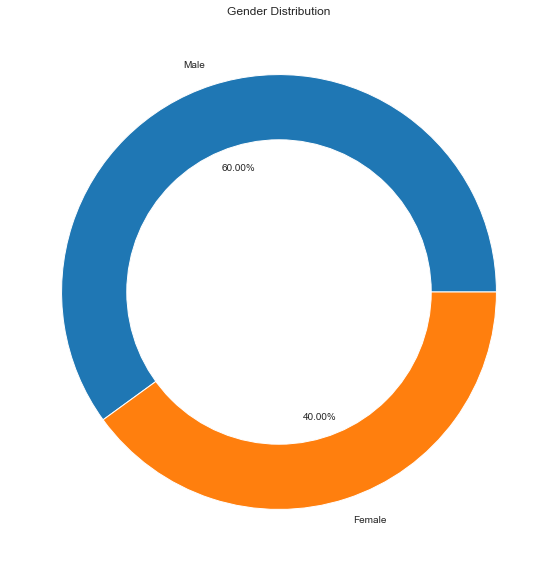

In [19]:
my_circle=plt.Circle( (0,0), 0.7, color='white') 

plt.figure(figsize=(10,10))

plt.pie(total.values,
        labels = total.index,
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Gender Distribution')
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\gender_distribution.png');

2. Age Distribution

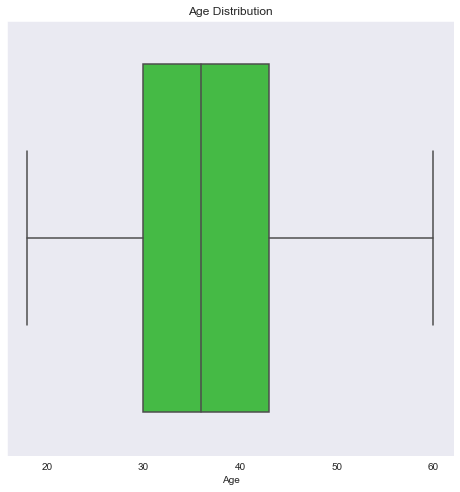

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(x=data["Age"], color='limegreen')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\age_distribution1.png');

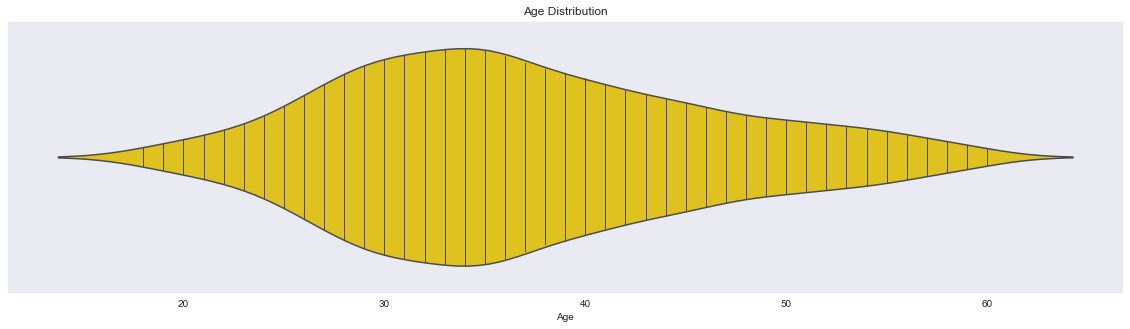

In [21]:
plt.figure(figsize=(20,5))
sns.violinplot(data['Age'], color='gold', inner='stick');
plt.title('Age Distribution')
plt.xlabel('Age');
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\age_distribution2.png');

In [22]:
data['Age'].value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
58    14
56    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [23]:
data['Age'].max()

60

In [24]:
data['Age'].min()

18

In [25]:
data['Age'].mean()

36.923809523809524

In [26]:
data['Age'].mode()

0    35
dtype: int64

Let´s check some other variables

Target variable (Univariant Analysis)

In [27]:
total = data["Burnout"].value_counts()
total

No     1233
Yes     237
Name: Burnout, dtype: int64

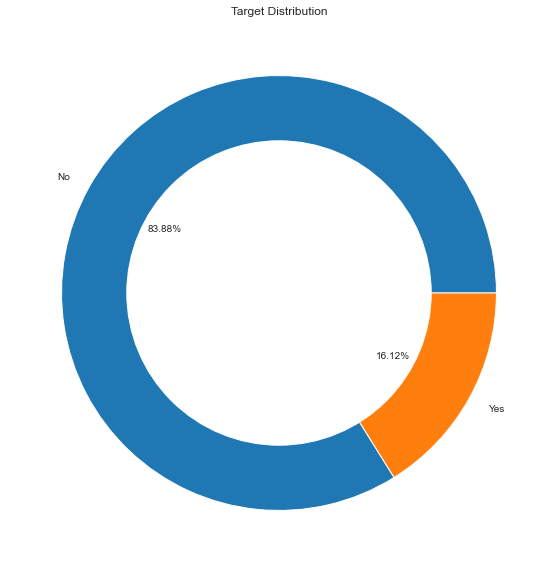

In [28]:
my_circle=plt.Circle( (0,0), 0.7, color='white') 

plt.figure(figsize=(10,10))

plt.pie(total.values,
        labels = total.index,
        autopct='%1.2f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Distribution')
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\burnout_distribution.png');


Target variable is highly imbalanced

Now, it´s time to focus on bivariant analysis (Target and other features)

Once I have done the feature importance (see in the feature engineering section), I decide to visualize the relationship between the categorical variables with the highest score and the target(burnout)

1. Categorical Features with highest score (see in the feature engineering section)

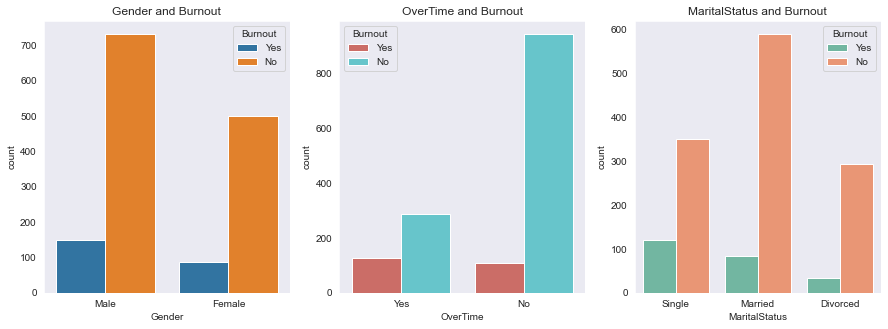

In [30]:
fig, axes = plt.subplots(1, 3,  figsize=(15, 5))

sns.countplot(data["Gender"], hue=data['Burnout'], ax=axes[0])
axes[0].set_title("Gender and Burnout")
sns.countplot(data["OverTime"], hue=data['Burnout'], palette='hls', ax=axes[1])
axes[1].set_title('OverTime and Burnout')
sns.countplot(data["MaritalStatus"], hue=data['Burnout'], palette='Set2', ax=axes[2])
axes[2].set_title('MaritalStatus and Burnout')
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\eda1.png');

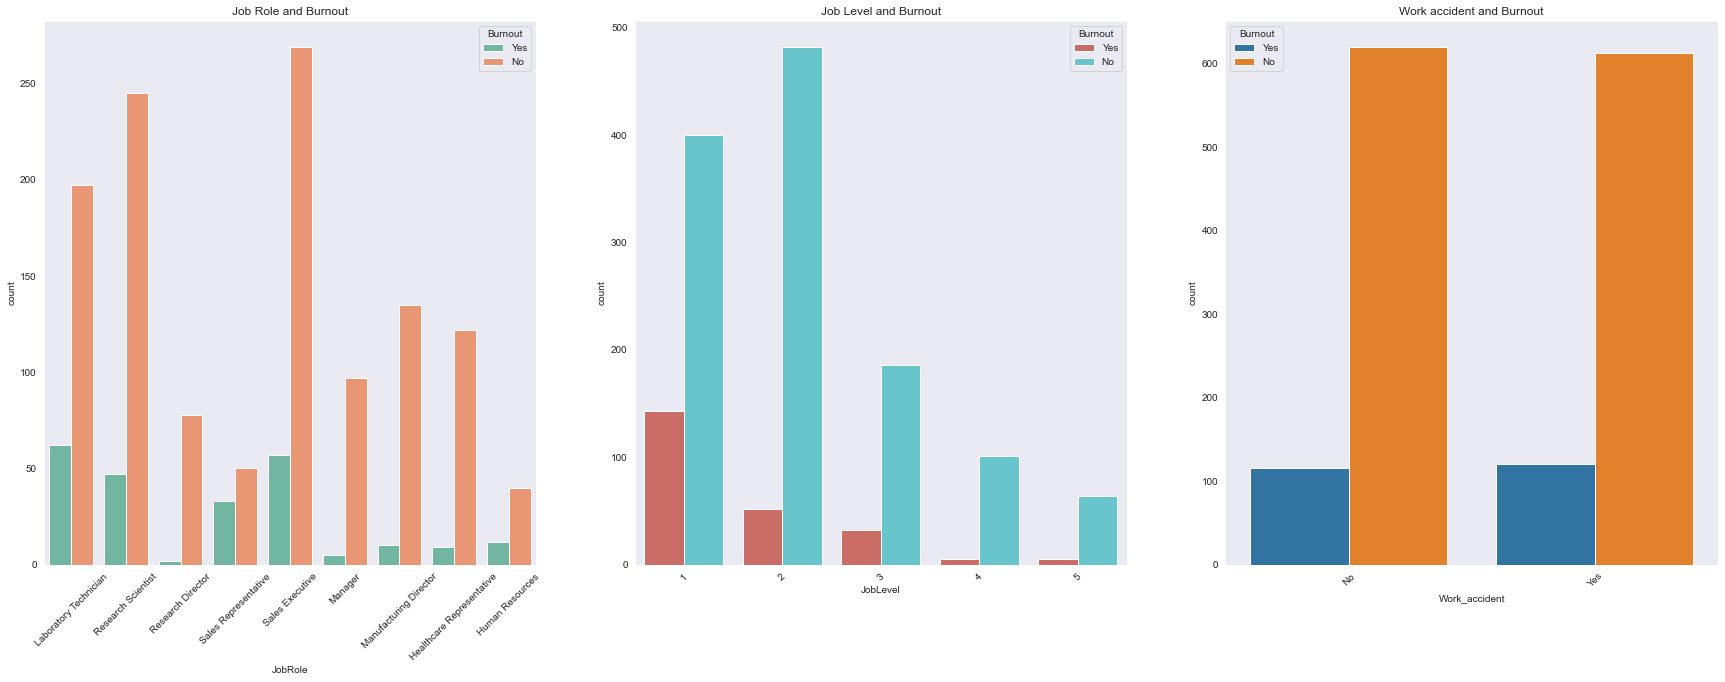

In [31]:
fig, axes = plt.subplots(1, 3,  figsize=(30, 10))

a = sns.countplot(data["JobRole"], hue=data['Burnout'], ax=axes[0], palette='Set2')
axes[0].set_title("Job Role and Burnout")
a.set_xticklabels(a.get_xticklabels(), rotation=45)
b = sns.countplot(data["JobLevel"], hue=data['Burnout'], palette='hls', ax=axes[1])
axes[1].set_title('Job Level and Burnout')
b.set_xticklabels(b.get_xticklabels(), rotation=45)
c = sns.countplot(data["Work_accident"], hue=data['Burnout'], ax=axes[2])
axes[2].set_title('Work accident and Burnout')
c.set_xticklabels(c.get_xticklabels(), rotation=45)
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\eda2.png');

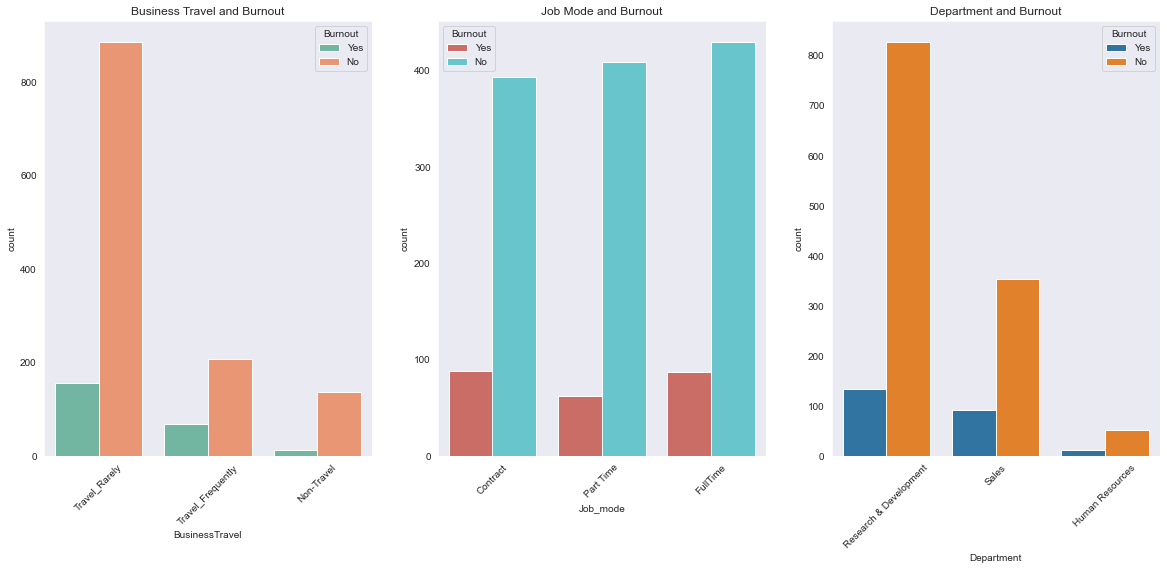

In [32]:
fig, axes = plt.subplots(1, 3,  figsize=(20, 8))

a = sns.countplot(data["BusinessTravel"], hue=data['Burnout'], ax=axes[0], palette='Set2')
axes[0].set_title("Business Travel and Burnout")
a.set_xticklabels(a.get_xticklabels(), rotation=45)
b = sns.countplot(data["Job_mode"], hue=data['Burnout'], palette='hls', ax=axes[1])
axes[1].set_title('Job Mode and Burnout')
b.set_xticklabels(b.get_xticklabels(), rotation=45)
c = sns.countplot(data["Department"], hue=data['Burnout'], ax=axes[2])
axes[2].set_title('Department and Burnout')
c.set_xticklabels(c.get_xticklabels(), rotation=45)
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\eda3.png');

2. Numerical features

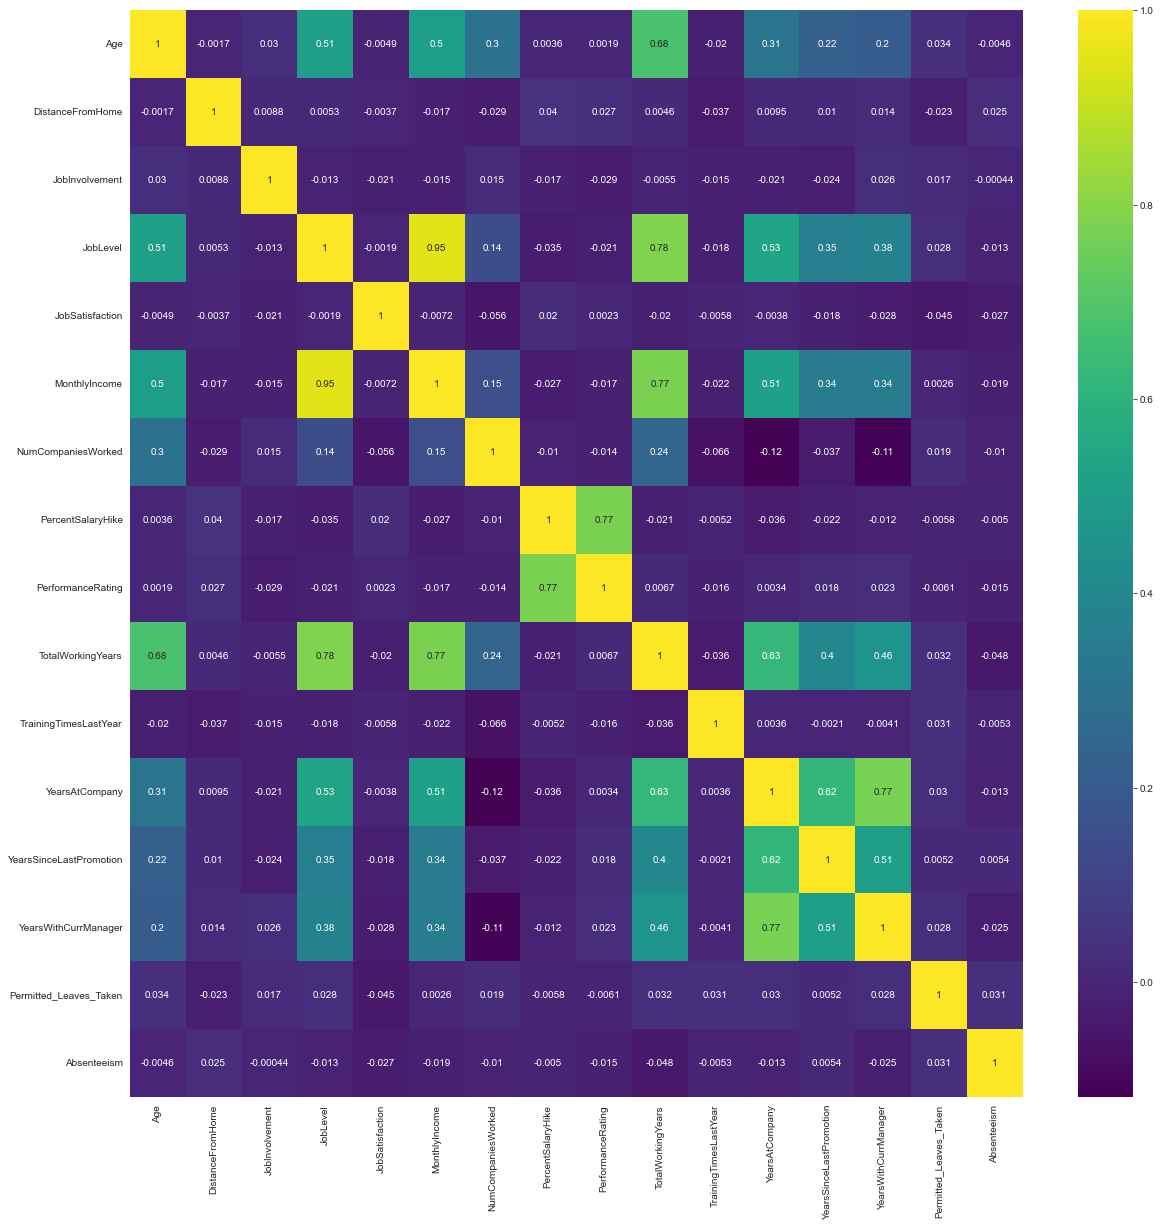

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap="viridis")
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\heatmap.png');


5. PREPROCESSING THE DATA

        5.1.Feature Engineering

Let´s check the categories in each variable!

In [35]:
data['Burnout'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [37]:
data['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [38]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [39]:
data['JobRole'].unique()

array(['Laboratory Technician', 'Research Scientist', 'Research Director',
       'Sales Representative', 'Sales Executive', 'Manager',
       'Manufacturing Director', 'Healthcare Representative',
       'Human Resources'], dtype=object)

In [40]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [41]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [42]:
data['Higher_Education'].unique()

array(['Graduation', 'Post-Graduation', 'PHD', '12th'], dtype=object)

In [43]:
data['Status_of_leaving'].unique()

array(['Salary', 'Work Accident', 'Dept.Head', 'Better Opportunity',
       'Work Environment'], dtype=object)

In [44]:
data['Mode_of_work'].unique()

array(['OFFICE', 'WFH'], dtype=object)

In [45]:
data['Work_accident'].unique()

array(['No', 'Yes'], dtype=object)

In [46]:
data['Source_of_Hire'].unique()

array(['Job Event', 'Recruiter', 'Job Portal', 'Walk-in'], dtype=object)

In [47]:
data['Job_mode'].unique()

array(['Contract', 'Part Time', 'FullTime'], dtype=object)

1.ENCODING

These two variables can alter the result of the model score if you perform a label encoder because it misinterprets the distances. Let's develop our own values 

Mapping

In [49]:
col         = 'BusinessTravel'
conditions  = [ data[col] == 'Non-Travel', data[col] == 'Travel_Rarely', data[col] == 'Travel_Frequently']
choices     = [ 0, 1, 2 ]
    
data['BusinessTravel'] = np.select(conditions, choices)
data['BusinessTravel'] = data['BusinessTravel']

In [50]:
col         = 'Higher_Education'
conditions  = [ data[col] == '12th', data[col] == 'Graduation', data[col] == 'Post-Graduation', data[col] == 'PHD' ]
choices     = [ 0, 1, 2, 3 ]
    
data['Higher_Education'] = np.select(conditions, choices)
data['Higher_Education'] = data['Higher_Education']

Label Encoder

In [51]:
label_encoder(data=data,column='Burnout')

In [52]:
label_encoder(data=data,column='Department')

In [53]:
label_encoder(data=data,column='Gender')

In [54]:
label_encoder(data=data,column='JobRole')

In [55]:
label_encoder(data=data,column='MaritalStatus')

In [56]:
label_encoder(data=data,column='OverTime')

In [57]:
label_encoder(data=data,column='Status_of_leaving')

In [58]:
label_encoder(data=data,column='Mode_of_work')

In [59]:
label_encoder(data=data,column='Work_accident')

In [60]:
label_encoder(data=data,column='Source_of_Hire')

In [61]:
label_encoder(data=data,column='Job_mode')

In [62]:
data

,Age,Burnout,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Permitted_Leaves_Taken,Absenteeism,Work_accident,Source_of_Hire,Job_mode
0,37,1,1,1,2,1,2,1,2,3,2,2090,6,1,15,3,7,3,0,0,0,1,2,0,4,2,0,0,0
1,21,0,1,1,15,1,3,1,6,4,2,1232,1,0,14,3,0,6,0,0,0,1,3,1,5,2,0,2,2
2,45,0,1,1,6,1,3,3,5,1,1,13245,4,1,14,3,17,3,0,0,0,2,1,1,1,3,0,0,0
3,23,0,1,2,2,1,3,1,8,1,0,2322,3,0,13,3,3,3,0,0,0,3,3,0,1,0,1,2,1
4,22,0,1,1,15,0,3,1,2,4,2,2871,1,0,15,3,1,5,0,0,0,3,0,1,5,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,1,2,3,1,2,4,3,1,1,16856,1,0,11,3,34,3,34,1,16,2,2,0,3,2,0,1,2
1466,55,0,1,1,1,1,3,5,3,1,2,19045,0,1,14,3,37,2,36,4,13,2,3,1,1,1,0,3,1
1467,55,0,1,2,26,1,2,5,3,4,1,19586,1,0,21,4,36,3,36,2,13,2,3,0,2,1,0,2,2
1468,58,0,1,2,10,1,3,4,7,3,2,13872,0,0,13,3,38,1,37,1,8,3,4,1,2,2,1,0,2


In [63]:
data.dtypes

Age                        int64
Burnout                    int32
BusinessTravel             int32
Department                 int32
DistanceFromHome           int64
Gender                     int32
JobInvolvement             int64
JobLevel                   int64
JobRole                    int32
JobSatisfaction            int64
MaritalStatus              int32
MonthlyIncome              int64
NumCompaniesWorked         int64
OverTime                   int32
PercentSalaryHike          int64
PerformanceRating          int64
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
Higher_Education           int32
Status_of_leaving          int32
Mode_of_work               int32
Permitted_Leaves_Taken     int64
Absenteeism                int64
Work_accident              int32
Source_of_Hire             int32
Job_mode                   int32
dtype: object

2. FEATURE REDUCTION: 
2.1 FEATURE IMPORTANCE

In [64]:
X = data.drop(['Burnout'], 1)
y = data['Burnout']

In [65]:
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(k=5)
X_new = sel.fit_transform(X, y)

names = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
         'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
         'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education', 'Status_of_leaving', 'Mode_of_work',
           'Permitted_Leaves_Taken','Absenteeism', 'Work_accident', 'Source_of_Hire','Job_mode'        
                   ]
F_imp = pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)
F_imp.set_index(['column'], inplace=True)

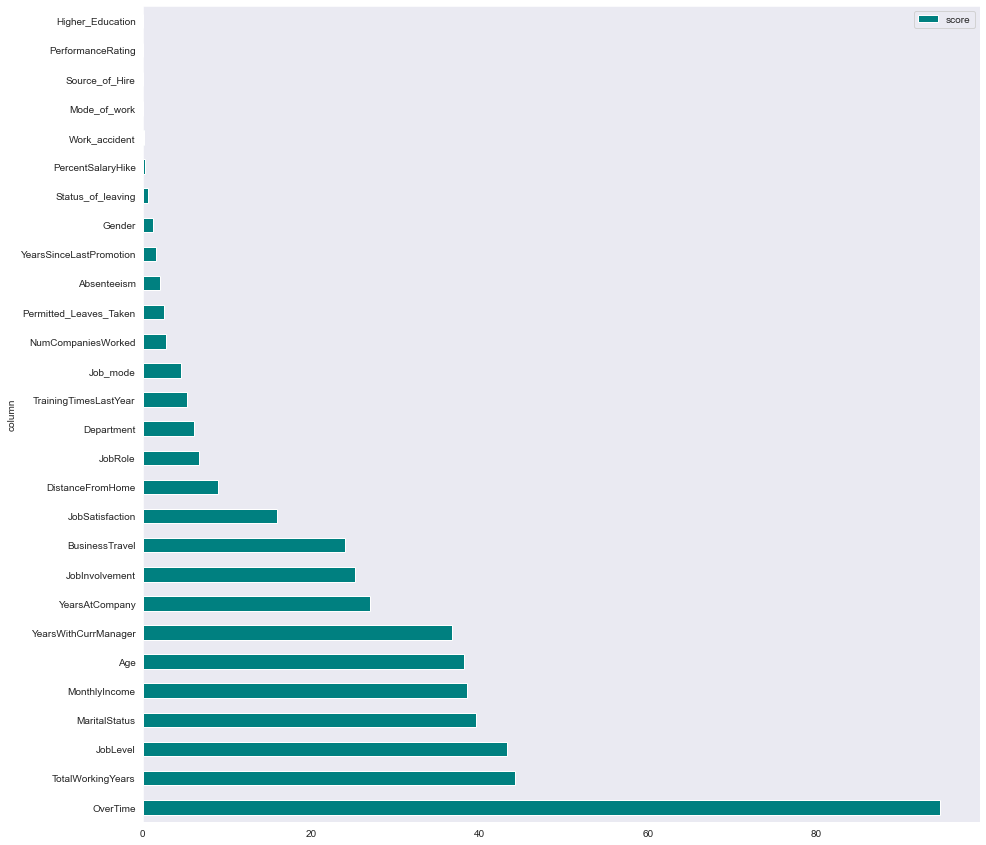

In [66]:
F_imp.plot.barh(y='score', figsize=(15,15), color= 'teal')
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\f.importance.png');

Correlation between features and target variable

In [67]:
co_ma = data.corr()[['Burnout']]. round(2).sort_values(by = ['Burnout'], ascending = False).drop(['Burnout'])
co_ma

,Burnout
OverTime,0.25
MaritalStatus,0.16
BusinessTravel,0.13
DistanceFromHome,0.08
JobRole,0.07
Department,0.06
NumCompaniesWorked,0.04
Gender,0.03
Status_of_leaving,0.02
Work_accident,0.01


2. FEATURE REDUCTION: 
2.2. LINEAL COODEPENDENCE

In [68]:
data_numerical = data.drop(['BusinessTravel','Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Higher_Education', 'Status_of_leaving', 'Mode_of_work', 'Work_accident',
                            'Source_of_Hire', 'Job_mode', 'Burnout'],1)

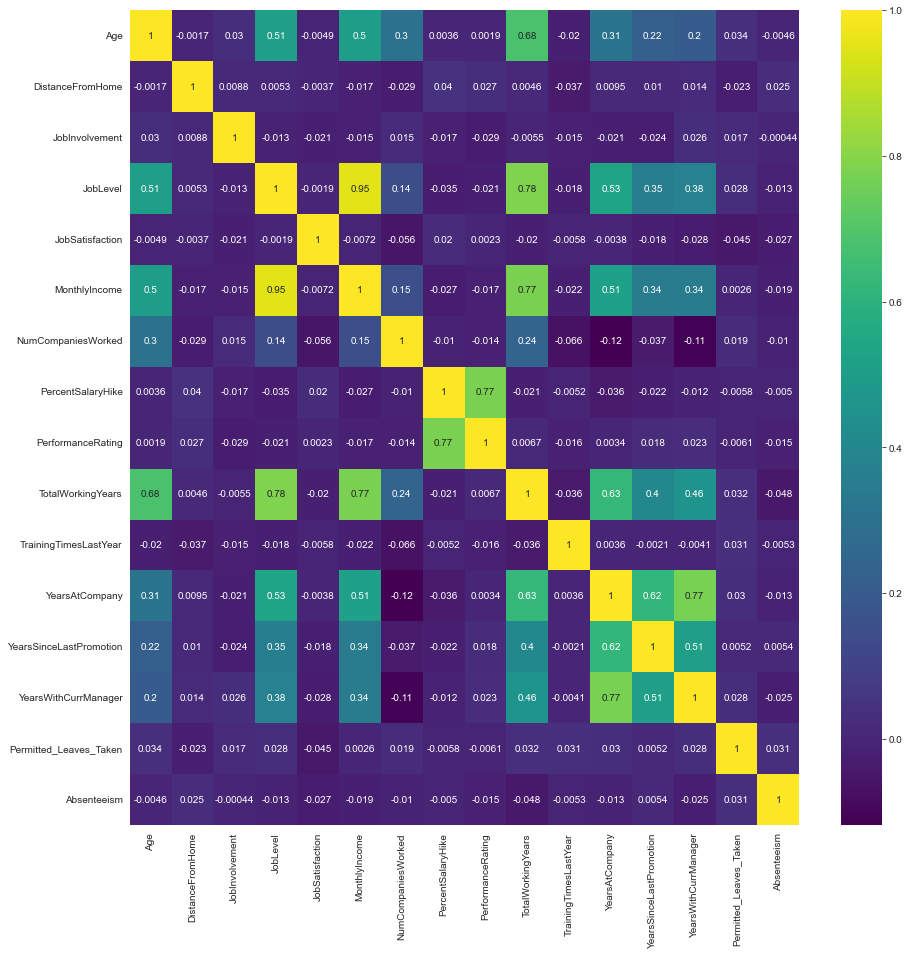

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(data_numerical.corr(),annot=True,cmap="viridis")
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\coodep.png');

The following heatmap also takes into account the correlation between the categorical features using PhiK correlation 

interval columns not set, guessing: ['Age', 'Burnout', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education', 'Status_of_leaving', 'Mode_of_work', 'Permitted_Leaves_Taken', 'Absenteeism', 'Work_accident', 'Source_of_Hire', 'Job_mode']


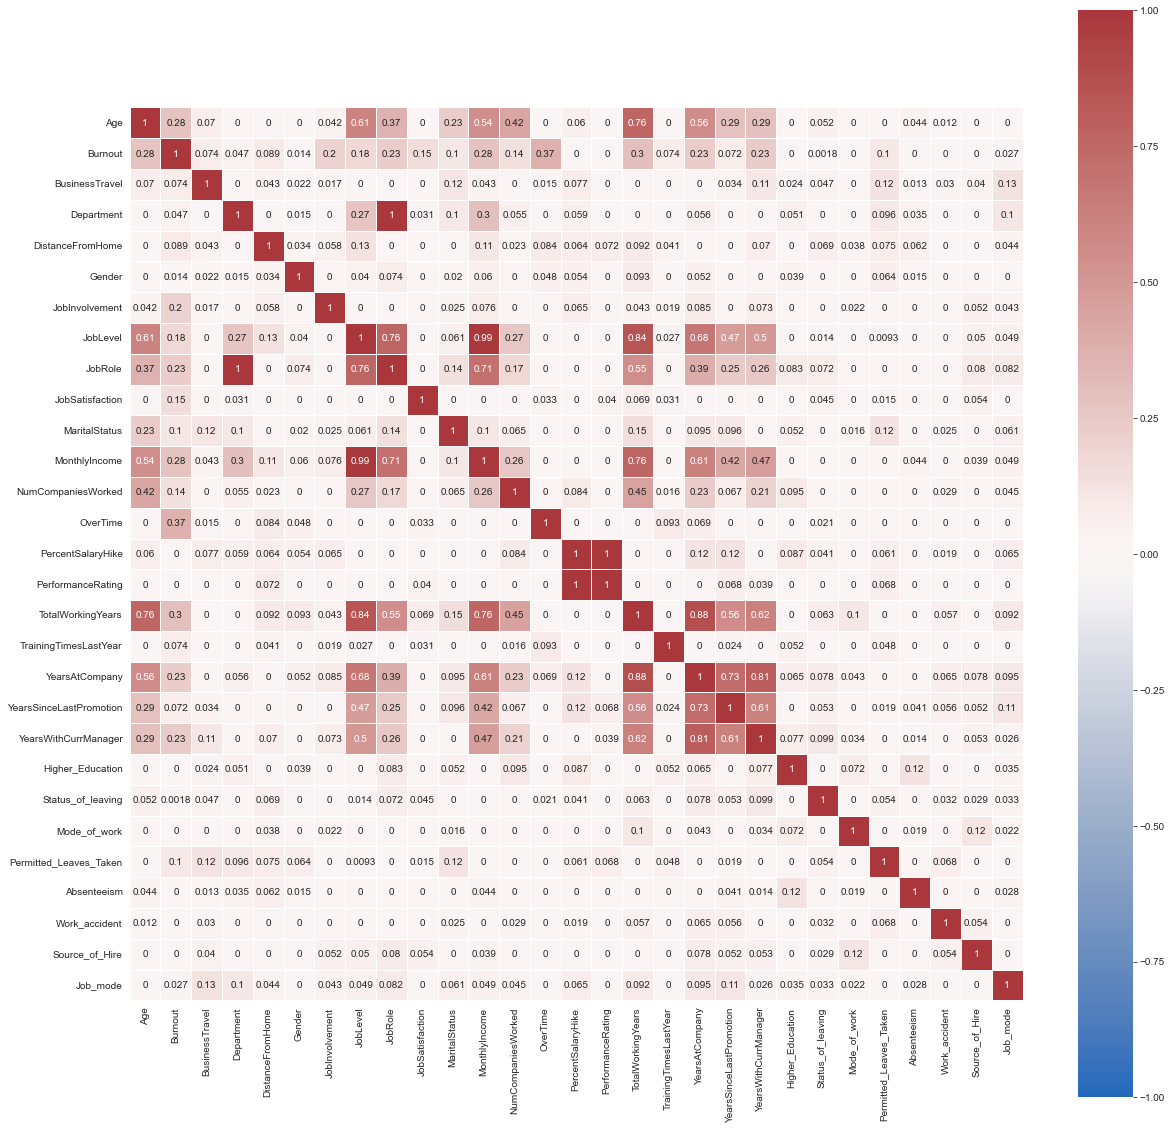

In [70]:
import phik
phik_matrix = data.phik_matrix()

plt.figure(figsize=(20,20))
sns.heatmap(phik_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.color_palette("vlag", as_cmap=True),
            square=True,
            annot=True,
            linewidths=.5)
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\correl_phik.png');

There is lineal coodependence between:
    AGE & JOB LEVEL; AGE & TOTAL WORKING YEARS;
    DEPARTMENT & MONTHLY INCOME;
    JOB LEVEL & JOB ROLE; JOB LEVEL & MONTHLY INCOME; JOB LEVEL & TOTAL W.YEARS; JOB LEVEL & YEARS AT COMPANY;
    JOB ROLE & MONTHLY INCOME!!!; MONTHLY INCOME & TOTAL W.YEARS;
    TOTAL W.YEARS & YEARS AT COMPANY;
    YEARS AT COMPANY & YEARS SINCE LAST PROMOTION; YEARS AT COMPANY & YEARS WITH CURRENT MANAGER
    

    

3. NEW FEATURES

In [72]:
data.shape

(1470, 29)

In [73]:
df_ibm = pd.read_csv('../data/raw/IBM-HR-Employee-Attrition.csv')

In [74]:
data['EnvironmentSatisfaction'] = df_ibm['EnvironmentSatisfaction']
data['RelationshipSatisfaction'] = df_ibm['RelationshipSatisfaction']
data['WorkLifeBalance'] = df_ibm['WorkLifeBalance']

In [75]:
data.shape

(1470, 32)

In [77]:
df_hr = pd.read_csv('../data/raw/HR.csv')

In [78]:
df_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [79]:
data['last_evaluation'] = df_hr['last_evaluation']
data['number_project'] = df_hr['number_project']
data['Work_accident'] = df_hr['Work_accident']
data['average_montly_hours'] = df_hr['average_montly_hours']

In [80]:
data.isnull().sum()

Age                         0
Burnout                     0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
TotalWorkingYears           0
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Higher_Education            0
Status_of_leaving           0
Mode_of_work                0
Permitted_Leaves_Taken      0
Absenteeism                 0
Work_accident               0
Source_of_Hire              0
Job_mode                    0
EnvironmentSatisfaction     0
RelationshipSatisfaction    0
WorkLifeBalance             0
last_evaluation             0
number_pro

4. TRANSFORMACIÓN DE FEATURES

In [82]:
data['promedio'] = (data['TotalWorkingYears'] + data['Age'])/2

In [83]:
#ESTAS ÚLTIMAS TRANSFORMACIONES NO LO MEJORAN ASÍ QUE NO LA VOY A INCLUIR

In [84]:
#data['stuck'] = (data['YearsSinceLastPromotion'] + data['YearsWithCurrManager'])/2

In [85]:
#data['absenteeism_new'] = (data['Permitted_Leaves_Taken'] + data['Absenteeism'])
#data['absenteeism_new']

In [86]:
#data['Absenteeism']

5. RANDOM_OVER_SAMPLER

In [87]:
#SI METO ENVIRONMENTSATISF MEJORAN, SI ADEMÁS AÑADO REALTIONSHIPSATISF Y WORKLIFEBALANCE: EMPEORAN(SALVO RFOREST SOLO LA ROC)

In [88]:
#SI METO ENVIRONMENTSATISF Y WORKLIFEBALANCE, ESTÁN MEJOR QUE CON LAS OTRAS TRES JUNTAS

In [89]:
#SI METO SÓLO ENVIRONMENTSATISF, ADABOOST MEJORA Y NO BAJA LA MATRIZ DE CONFUSIÓN. ME QUEDO CON ENVIRONM SOLO

In [90]:
#VOY A PROBAR METIENDO SOLOS WORK ACCIDENT: RANDOM FOREST MEJORA Y ADA BOOST SE MANTIENE IGUAL

In [91]:
#AHORA AÑADO TAMBIEN LAST EVALUATION Y ADABOOST EMPEORA 

In [92]:
#QUITO LAST EVALUATION Y AÑADO NUMBER PROJECT Y NO MEJORAN NINGUNO

In [93]:
#PRUEBO A QUITAR OVERTIME Y CAMBIARLO POR METER AVERAGE MONTHLY HOURS: EMPEORAN, CONSIDERABLEMENTE, TODOS LOS MODELOS

In [94]:
#AL AÑADIR PERMITTED LEAVES TAKEN, LA MATRIZ DE CONFUSIÓN DEL ADA ME MEJORA YA QUE CLASFICA COMO POSITIVO MEJOR A UNO MÁS, ES DECIR, DE 11-40 A 10-41

In [95]:
data.to_csv('../data/processed/data_processed.csv')

In [96]:
X = data[['OverTime', 'MaritalStatus',  'DistanceFromHome', 'JobRole', 'JobLevel','EnvironmentSatisfaction', 'Work_accident', 'promedio', 'Permitted_Leaves_Taken']]
y = data['Burnout']

In [97]:
data['promedio']

0       22.0
1       10.5
2       31.0
3       13.0
4       11.5
        ... 
1465    43.0
1466    46.0
1467    45.5
1468    48.0
1469    49.0
Name: promedio, Length: 1470, dtype: float64

In [98]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [99]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, Y_train)

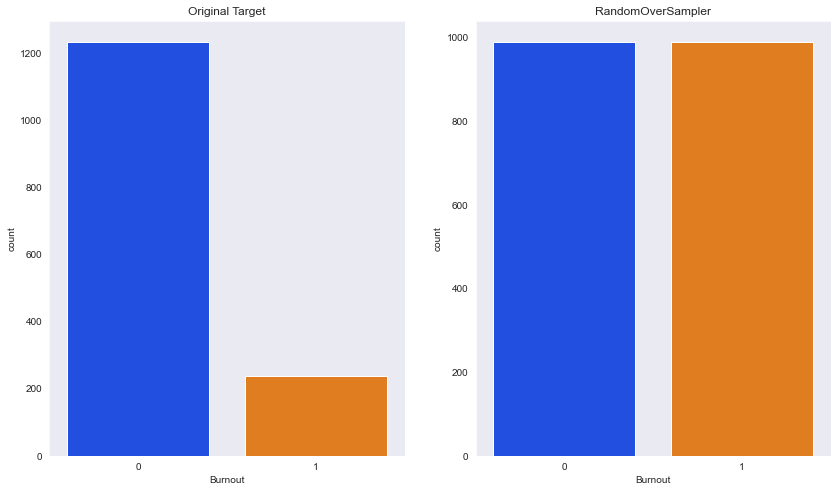

In [100]:
fig, axes = plt.subplots(1, 2, figsize= (14,8))

k = sns.countplot(ax=axes[0], x ='Burnout', data = data, palette='bright')
axes[0].set_title('Original Target')


r = sns.countplot(ax=axes[1], x =  y_train_ros, data = data, palette='bright')
axes[1].set_title('RandomOverSampler')
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\Oversampling.png');

6. MODELS AND PREDICTIONS

In [103]:
'''model = linear_model.LogisticRegression(max_iter = 1000)
parameters_model = {
    'C': [20, 50, 100, 200, 500, 1000],
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],                                  
}'''

"model = linear_model.LogisticRegression(max_iter = 1000)\nparameters_model = {\n    'C': [20, 50, 100, 200, 500, 1000],\n    'max_iter': [20, 50, 100, 200, 500, 1000],                      \n    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],                                  \n}"

In [104]:
'''model_gridsearch = GridSearchCV(model, parameters_model, cv = 5, scoring= 'roc_auc', n_jobs=-1)'''

"model_gridsearch = GridSearchCV(model, parameters_model, cv = 5, scoring= 'roc_auc', n_jobs=-1)"

In [105]:
#model_gridsearch.fit(X_train_ros, y_train_ros)

In [106]:
#model_gridsearch.best_params_

In [107]:
#REGRESIÓN LOGÍSTICA

Accuracy_score: 0.7142857142857143
Acierto: 71.43 %
Error: 28.57 %
Confusion_matrix: [[172  71]
 [ 13  38]]
Recall_score: 0.349
F1_score: 0.475
Roc_auc_score: 0.7264584846284192


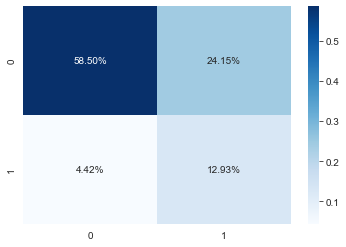

In [108]:
model = linear_model.LogisticRegression(C = 200, max_iter = 20, solver='sag')
model.fit(X_train_ros, y_train_ros)
predictions = model.predict(X_test)
print('Accuracy_score:', accuracy_score(Y_test, predictions))
acierto = accuracy_score(Y_test, predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix = confusion_matrix(Y_test, predictions)
print('Confusion_matrix:', c_matrix)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(predictions, Y_test), 3))
print("F1_score:", round(f1_score(predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, predictions))
Recall_Reg_log = round(recall_score(predictions, Y_test), 3)
Roc_Reg_log =  round(roc_auc_score(Y_test, predictions), 3)
FNreg_Reg_log = 14
TPreg_Reg_log = 37

In [109]:
filename = '../model/reg_log'
joblib.dump(model, filename)

['../model/reg_log']

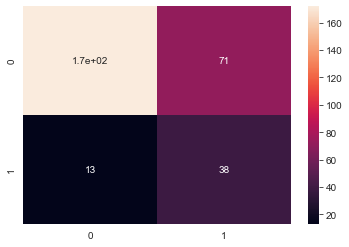

In [110]:
sns.heatmap(c_matrix, annot=True);

In [111]:
#RANDOM FOREST CLASSIFIER

In [112]:
'''rnd_grid =  RandomForestClassifier()

parameters = {'n_estimators': np.arange(0,100, 1),
               'max_depth': np.arange(0,10, 1),
               'max_leaf_nodes': np.arange(0,10, 1)}
             

rnd_gridsearch = GridSearchCV(rnd_grid, parameters, cv = 5, scoring= 'roc_auc', n_jobs=-1)

rnd_gridsearch.fit(X_train_ros, y_train_ros)'''

"rnd_grid =  RandomForestClassifier()\n\nparameters = {'n_estimators': np.arange(0,100, 1),\n               'max_depth': np.arange(0,10, 1),\n               'max_leaf_nodes': np.arange(0,10, 1)}\n             \n\nrnd_gridsearch = GridSearchCV(rnd_grid, parameters, cv = 5, scoring= 'roc_auc', n_jobs=-1)\n\nrnd_gridsearch.fit(X_train_ros, y_train_ros)"

In [113]:
'''rnd_gridsearch.best_params_'''

'rnd_gridsearch.best_params_'

Accuracy_score: 0.7551020408163265
Acierto: 75.51 %
Error: 24.49 %
Confusion_matrix: [[188  55]
 [ 17  34]]
Recall_score: 0.382
F1_score: 0.486
Roc_auc_score: 0.7201646090534979


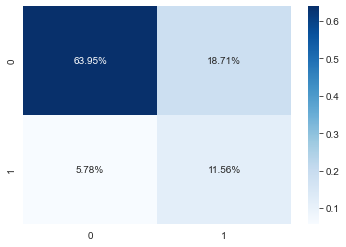

In [114]:
rnd_clf = RandomForestClassifier(n_estimators = 35, max_leaf_nodes = 9, max_depth = 9, random_state= 42) 

rnd_clf.fit(X_train_ros, y_train_ros)

y_pred_rf = rnd_clf.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, y_pred_rf))
acierto = accuracy_score(Y_test, y_pred_rf)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
print('Confusion_matrix:', c_matrix_rf)
sns.heatmap(c_matrix_rf/np.sum(c_matrix_rf), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(y_pred_rf, Y_test), 3))
print("F1_score:", round(f1_score(y_pred_rf, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, y_pred_rf))
Recall_RandomForest =  round(recall_score(y_pred_rf, Y_test), 3)
Roc_RandomForest =  round(roc_auc_score(Y_test, y_pred_rf), 3)
FN_RandomForest = 17
TP_RandomForest = 34

In [115]:
filename = '../model/random_forest'
joblib.dump(model, filename)

['../model/random_forest']

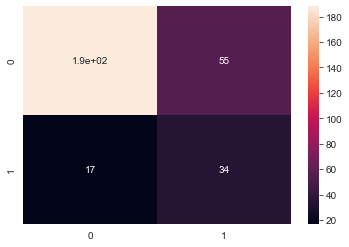

In [116]:
sns.heatmap(c_matrix_rf, annot=True);

In [117]:
#DECISION TREE

Accuracy_score: 0.7346938775510204
Acierto: 73.47 %
Error: 26.53 %
Confusion_matrix: [[195  48]
 [ 30  21]]
Recall_score: 0.304
F1_score: 0.35
Roc_auc_score: 0.607116920842411


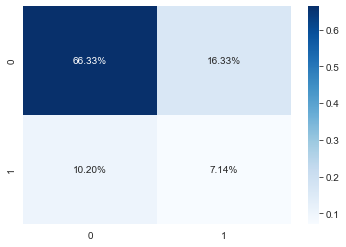

In [118]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_ros, y_train_ros)
dtc_predictions = dtc.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, dtc_predictions))
acierto = accuracy_score(Y_test, dtc_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_dtc = confusion_matrix(Y_test, dtc_predictions)
print('Confusion_matrix:', c_matrix_dtc)
sns.heatmap(c_matrix_dtc/np.sum(c_matrix_dtc), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(dtc_predictions, Y_test), 3))
print("F1_score:", round(f1_score(dtc_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, dtc_predictions))
Recall_DecisionTree = round(recall_score(dtc_predictions, Y_test), 3)
Roc_DecesionTree =  round(roc_auc_score(Y_test, dtc_predictions), 3)
FN_DecesionTree = 31
TP_DecesionTree = 20

In [119]:
#KNN CON GRIDSEARCH

In [120]:
'''knn_grid = KNeighborsClassifier()

parameters = {'n_neighbors': np.arange(0,200, 1)
              }

knn_gridsearch = GridSearchCV(knn_grid, parameters, cv = 100, scoring= 'roc_auc')

knn_gridsearch.fit(X_train_ros, y_train_ros)'''

"knn_grid = KNeighborsClassifier()\n\nparameters = {'n_neighbors': np.arange(0,200, 1)\n              }\n\nknn_gridsearch = GridSearchCV(knn_grid, parameters, cv = 100, scoring= 'roc_auc')\n\nknn_gridsearch.fit(X_train_ros, y_train_ros)"

In [121]:
#knn_gridsearch.best_params_

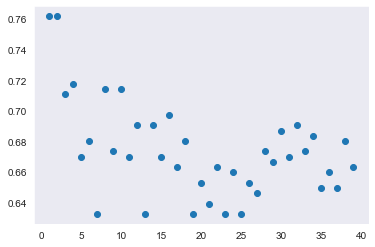

In [122]:
n_neighbors = 2

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_ros, y_train_ros)
knn_predictions = knn.predict(X_test)
k_range = range(1, 40)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_ros, y_train_ros)
    
    scores.append(knn.score(X_test, Y_test))

plt.scatter(k_range, scores);

Accuracy_score: 0.7619047619047619
Acierto: 76.19 %
Error: 23.81 %
Confusion_matrix: [[210  33]
 [ 37  14]]
Recall_score: 0.298
F1_score: 0.286
Roc_auc_score: 0.5693536673928831


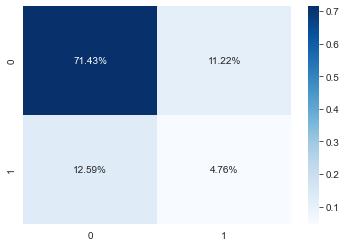

In [123]:
print('Accuracy_score:', accuracy_score(Y_test, knn_predictions))
acierto = accuracy_score(Y_test, knn_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_knn = confusion_matrix(Y_test, knn_predictions)
print('Confusion_matrix:', c_matrix_knn)
sns.heatmap(c_matrix_knn/np.sum(c_matrix_knn), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(knn_predictions, Y_test), 3))
print("F1_score:", round(f1_score(knn_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, knn_predictions))
Recall_KNN = round(recall_score(knn_predictions, Y_test), 3)
Roc_KNN =  round(roc_auc_score(Y_test, knn_predictions), 3)
FN_KNN = 35
TP_KNN = 16

In [124]:
#ENSEMBLES

In [125]:
#ADABOOST:  ES EL MEJOR, GUARDARLO

In [126]:
'''dectree_grid = DecisionTreeClassifier()

parameters_dec = {'max_depth': np.arange(0,20, 1)}
             

dectree_gridsearch = GridSearchCV(dectree_grid, parameters_dec, cv = 10, scoring= 'roc_auc')

dectree_gridsearch.fit(X_train_ros, y_train_ros)'''

"dectree_grid = DecisionTreeClassifier()\n\nparameters_dec = {'max_depth': np.arange(0,20, 1)}\n             \n\ndectree_gridsearch = GridSearchCV(dectree_grid, parameters_dec, cv = 10, scoring= 'roc_auc')\n\ndectree_gridsearch.fit(X_train_ros, y_train_ros)"

In [127]:
#dectree_gridsearch.best_params_

In [128]:
'''ada_grid = AdaBoostClassifier()

parameters_ada = {'n_estimators': np.arange(0,200, 1)}
             

ada_gridsearch = GridSearchCV(ada_grid, parameters_ada, cv = 10, scoring= 'roc_auc')

ada_gridsearch.fit(X_train_ros, y_train_ros)'''

"ada_grid = AdaBoostClassifier()\n\nparameters_ada = {'n_estimators': np.arange(0,200, 1)}\n             \n\nada_gridsearch = GridSearchCV(ada_grid, parameters_ada, cv = 10, scoring= 'roc_auc')\n\nada_gridsearch.fit(X_train_ros, y_train_ros)"

In [129]:
#ada_gridsearch.best_params_

Accuracy_score: 0.7482993197278912
Acierto: 74.83 %
Error: 25.17 %
Confusion_matrix: [[179  64]
 [ 10  41]]
Recall_score: 0.39
F1_score: 0.526
Roc_auc_score: 0.7702735415153715


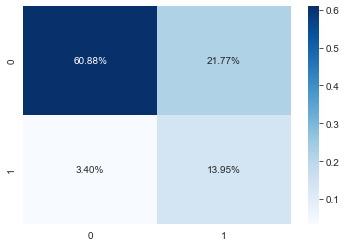

In [130]:
estimator = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(base_estimator=estimator,
                            n_estimators=50,
                            random_state=42)

ada_clf.fit(X_train_ros, y_train_ros)
ada_predictions = ada_clf.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, ada_predictions))
acierto = accuracy_score(Y_test, ada_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_ada = confusion_matrix(Y_test, ada_predictions)
print('Confusion_matrix:', c_matrix_ada)
sns.heatmap(c_matrix_ada/np.sum(c_matrix_ada), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(ada_predictions, Y_test), 3))
print("F1_score:", round(f1_score(ada_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, ada_predictions))
Recall_Adaboost = round(recall_score(ada_predictions, Y_test), 3)
Roc_Adaboost =  round(roc_auc_score(Y_test, ada_predictions),3)
FN_Adaboost = 11
TP_Adaboost = 40

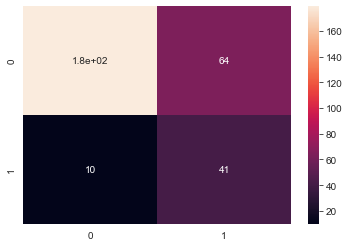

In [131]:
sns.heatmap(c_matrix_ada, annot=True)
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\matriz_ada.png');

In [132]:
filename = '../model/AdaBoost'
joblib.dump(model, filename)

['../model/AdaBoost']

In [133]:
#GRADIENT BOOSTING

Accuracy_score: 0.8027210884353742
Acierto: 80.27 %
Error: 19.73 %
Confusion_matrix: [[217  26]
 [ 32  19]]
Recall_score: 0.422
F1_score: 0.396
Roc_auc_score: 0.6327765674170903


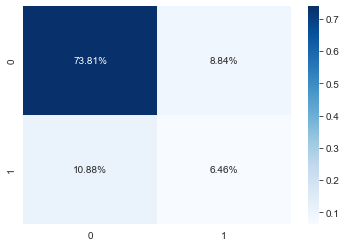

In [134]:
gbct = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 random_state=42)
gbct.fit(X_train_ros, y_train_ros)
gbct_predictions = gbct.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, gbct_predictions))
acierto = accuracy_score(Y_test, gbct_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_gbct= confusion_matrix(Y_test, gbct_predictions)
print('Confusion_matrix:', c_matrix_gbct)
sns.heatmap(c_matrix_gbct/np.sum(c_matrix_gbct), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(gbct_predictions, Y_test), 3))
print("F1_score:", round(f1_score(gbct_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, gbct_predictions))
Recall_GradientBoost = round(recall_score(gbct_predictions, Y_test), 3)
Roc_GradientBoost = round(roc_auc_score(Y_test, gbct_predictions), 3)
FN_GradientBoost = 30
TP_GradientBoost = 21

In [135]:
#XGBOOST

In [136]:
'''xgb_grid =  xgboost.XGBRFClassifier()

parameters_xgb = {'n_estimators': np.arange(0,200, 1)}
             

xgb_gridsearch = GridSearchCV(xgb_grid, parameters_xgb, cv = 10, n_jobs=-1, scoring= 'roc_auc')

xgb_gridsearch.fit(X_train_ros, y_train_ros)'''

"xgb_grid =  xgboost.XGBRFClassifier()\n\nparameters_xgb = {'n_estimators': np.arange(0,200, 1)}\n             \n\nxgb_gridsearch = GridSearchCV(xgb_grid, parameters_xgb, cv = 10, n_jobs=-1, scoring= 'roc_auc')\n\nxgb_gridsearch.fit(X_train_ros, y_train_ros)"

In [137]:
#xgb_gridsearch.best_params_

[23:25:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy_score: 0.8027210884353742
Acierto: 80.27 %
Error: 19.73 %
Confusion_matrix: [[217  26]
 [ 32  19]]
Recall_score: 0.444
F1_score: 0.491
Roc_auc_score: 0.7024933430162188


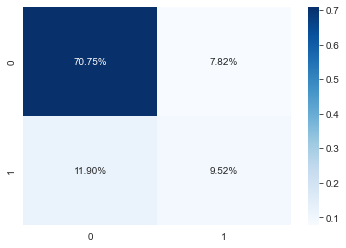

In [138]:
xgb_clas = xgboost.XGBRFClassifier(random_state=42,n_estimators=128)
xgb_clas.fit(X_train_ros, y_train_ros)
xgb_predictions = xgb_clas.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, xgb_predictions))
acierto = accuracy_score(Y_test, xgb_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_xgb= confusion_matrix(xgb_predictions, Y_test)
print('Confusion_matrix:', c_matrix_gbct)
sns.heatmap(c_matrix_xgb/np.sum(c_matrix_xgb), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(xgb_predictions, Y_test), 3))
print("F1_score:", round(f1_score(xgb_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, xgb_predictions))
Recall_XGBoost = round(recall_score(xgb_predictions, Y_test), 3)
Roc_XGBoost =  round(roc_auc_score(Y_test, xgb_predictions), 3)
FN_XGBoost = 30
TP_XGBoost = 21

In [139]:
filename = '../model/XGBooost'
joblib.dump(model, filename)

['../model/XGBooost']

In [140]:
#CATBOOST

Accuracy_score: 0.8129251700680272
Acierto: 81.29 %
Error: 18.71 %
Confusion_matrix: [[216  27]
 [ 28  23]]
Recall_score: 0.46
F1_score: 0.455
Roc_auc_score: 0.6699346405228757


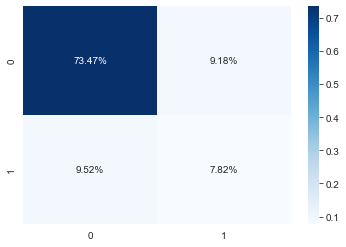

In [141]:
cbc_clas = CatBoostClassifier(silent=True)

cbc_clas.fit(X_train_ros, y_train_ros)
cbc_predictions = cbc_clas.predict(X_test)

print('Accuracy_score:', accuracy_score(Y_test, cbc_predictions))
acierto = accuracy_score(Y_test, cbc_predictions)
error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")
c_matrix_cbc= confusion_matrix(Y_test, cbc_predictions)
print('Confusion_matrix:', c_matrix_cbc)
sns.heatmap(c_matrix_cbc/np.sum(c_matrix_cbc), annot=True, 
            fmt='.2%', cmap='Blues');
print("Recall_score:", round(recall_score(cbc_predictions, Y_test), 3))
print("F1_score:", round(f1_score(cbc_predictions, Y_test), 3))
print('Roc_auc_score:', roc_auc_score(Y_test, cbc_predictions))
Recall_CatBoost = round(recall_score(cbc_predictions, Y_test), 3)
Roc_CatBoost =  round(roc_auc_score(Y_test, cbc_predictions), 3)
FN_CatBoost = 24
TP_CatBoost = 27


In [142]:
#RED NEURONAL

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_ros_scal= scaler.fit_transform(X_train_ros)
X_test_scal = scaler.transform(X_test)

In [144]:
'''neuro_model = keras.Sequential([
    keras.layers.Dense(128,input_shape=[9]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])'''

"neuro_model = keras.Sequential([\n    keras.layers.Dense(128,input_shape=[9]),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(128, activation='relu'),\n    keras.layers.Dense(64, activation='relu'),\n    keras.layers.Dense(1, activation='sigmoid'),\n])"

In [145]:
'''neuro_model.compile(optimizer='adam',
              loss = "binary_crossentropy",
              metrics = ['AUC', 'TruePositives', 'FalseNegatives'])'''

'neuro_model.compile(optimizer=\'adam\',\n              loss = "binary_crossentropy",\n              metrics = [\'AUC\', \'TruePositives\', \'FalseNegatives\'])'

In [146]:
'''neuro_model.fit(X_train_ros_scal, y_train_ros, validation_split = 0.2, epochs=50,)'''

'neuro_model.fit(X_train_ros_scal, y_train_ros, validation_split = 0.2, epochs=50,)'

In [147]:
#test_eval = neuro_model.evaluate(X_test, Y_test)

In [148]:
#test_eval

In [149]:
#neuro_predictions = neuro_model.predict(X_test)
#print(neuro_predictions) #Nos va dar un valor que la primera parte es la probabilidad, el segundo es la clase

In [150]:
#neuro_predictions[0]

In [151]:
#neuro_predictions[24]

In [152]:
#np.argmax(neuro_predictions, axis=1)[0]

In [153]:
#np.argmax(neuro_predictions, axis=1)[24]

In [154]:
#class_names = ['no burnout', 'burnout']

In [155]:
#class_names[np.argmax(neuro_predictions, axis=1)[24]]

In [156]:
Roc_red_neuronal = 0.535

In [157]:
scores = {
    'Model': ['Reg.log', 'RandomForest', 'DecisionTree', 'KNN', 'AdaBoost', 'GradientBoost', 'XGBoost', 'CatBoost', 'RedNeuronal'],
    'Roc_auc_score': [Roc_Reg_log, Roc_RandomForest, Roc_DecesionTree, Roc_KNN, Roc_Adaboost, Roc_GradientBoost, Roc_XGBoost, Roc_CatBoost, Roc_red_neuronal],
    'FN': [14, 17, 31, 35, 11, 30, 30, 24, 34],
    'TP': [37, 34, 20, 16, 40, 21, 21, 27, 17]
}
scores_df = pd.DataFrame(scores)
scores_df

,Model,Roc_auc_score,FN,TP
0,Reg.log,0.726,14,37
1,RandomForest,0.720,17,34
2,DecisionTree,0.607,31,20
3,KNN,0.569,35,16
4,AdaBoost,0.770,11,40
5,GradientBoost,0.633,30,21
6,XGBoost,0.702,30,21
7,CatBoost,0.670,24,27
8,RedNeuronal,0.535,34,17


In [176]:
scores_df.sort_values(by='Roc_auc_score', ascending=False, inplace=True)

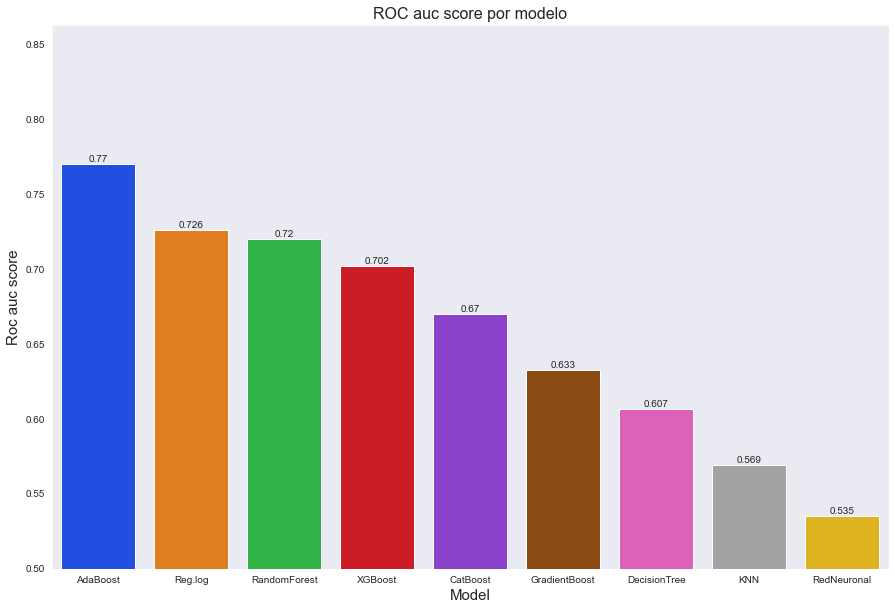

In [177]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Model', y='Roc_auc_score', data=scores_df, palette='bright')
fig = plt.gcf()
ax.bar_label(ax.containers[0])
plt.title('ROC auc score por modelo', fontsize=16)
plt.xlabel("Model", size=15)
plt.ylabel('Roc auc score', size=15)
plt.ylim(0.500, 0.863)
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\ROC_auc_score_por_modelo.png')

In [178]:
scores_df.sort_values('TP',ascending=False, inplace=True)

Text(0, 0.5, 'True positives')

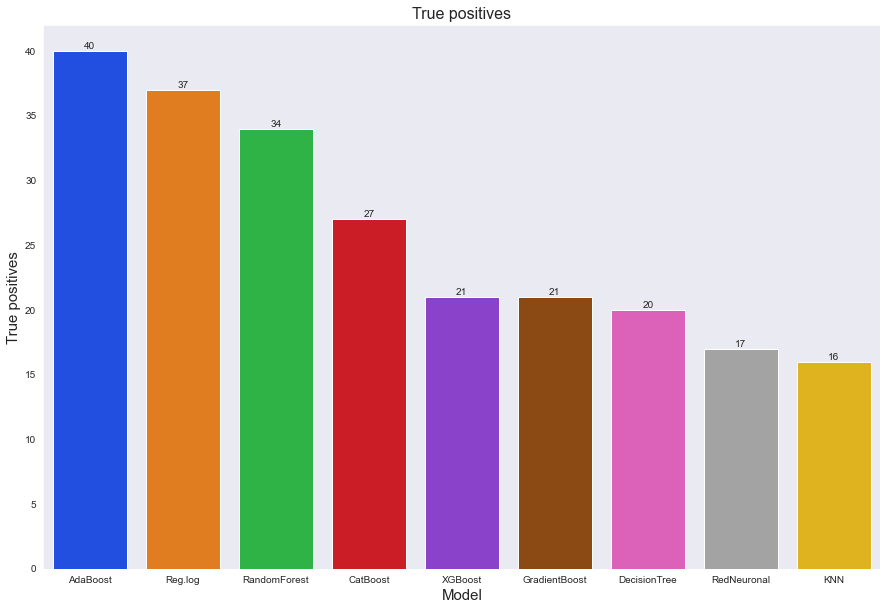

In [179]:
plt.figure(figsize=(15,10))
h = sns.barplot(x='Model', y='TP', data=scores_df, palette='bright')

fig = plt.gcf()
h.bar_label(h.containers[0])
plt.title('True positives', fontsize=16)
plt.xlabel("Model", size=15)
plt.ylabel('True positives', size=15)


In [180]:
scores_df.sort_values('FN',ascending=False, inplace=True)

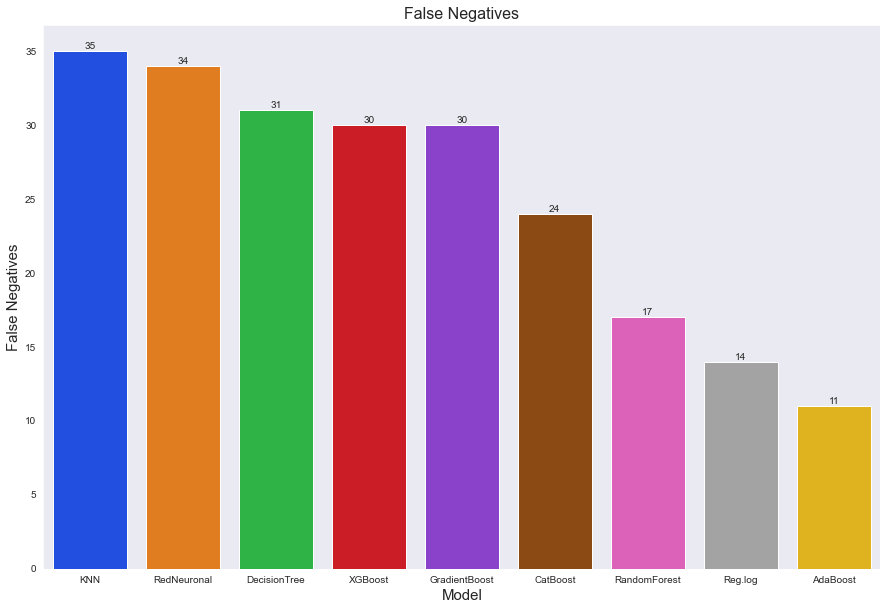

In [181]:
plt.figure(figsize=(15,10))
v=sns.barplot(x='Model', y='FN', data=scores_df, palette='bright')
fig = plt.gcf()
v.bar_label(v.containers[0])
plt.title('False Negatives', fontsize=16)
plt.xlabel("Model", size=15)
plt.ylabel('False Negatives', size=15);


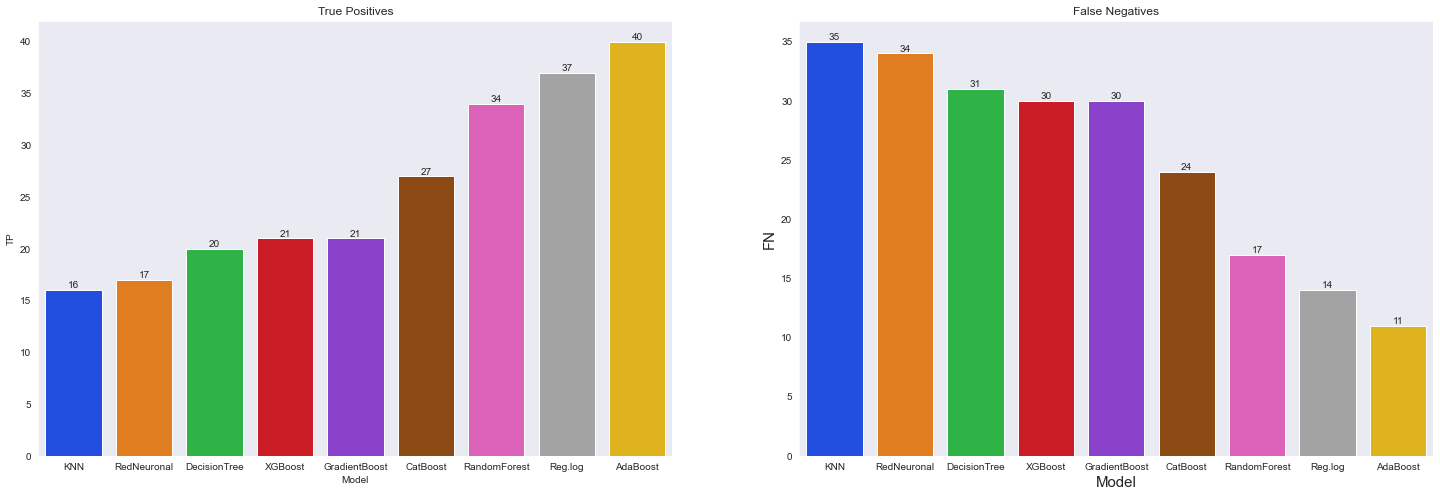

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(25, 8))

h = sns.barplot(ax=axes[0], x='Model', y='TP', data=scores_df, palette='bright')
axes[0].set_title("True Positives")
h.bar_label(h.containers[0])
plt.xlabel("Model", size=15)
plt.ylabel('True Positives', size=15)

v=sns.barplot(ax=axes[1], x='Model', y='FN', data=scores_df, palette='bright')
axes[1].set_title('False Negatives')
v.bar_label(v.containers[0])
plt.xlabel("Model", size=15)
plt.ylabel('FN', size=15)
plt.savefig(r'C:\Users\Master\Documents\contenido_bootcamp\ML\ML_Project\Reports\TP_FN_por_modelo.png');

In [165]:
data

,Age,Burnout,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Permitted_Leaves_Taken,Absenteeism,Work_accident,Source_of_Hire,Job_mode,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,last_evaluation,number_project,average_montly_hours,promedio
0,37,1,1,1,2,1,2,1,2,3,2,2090,6,1,15,3,7,3,0,0,0,1,2,0,4,2,0,0,0,2,1,1,0.53,2,157,22.0
1,21,0,1,1,15,1,3,1,6,4,2,1232,1,0,14,3,0,6,0,0,0,1,3,1,5,2,0,2,2,3,4,3,0.86,5,262,10.5
2,45,0,1,1,6,1,3,3,5,1,1,13245,4,1,14,3,17,3,0,0,0,2,1,1,1,3,0,0,0,4,2,3,0.88,7,272,31.0
3,23,0,1,2,2,1,3,1,8,1,0,2322,3,0,13,3,3,3,0,0,0,3,3,0,1,0,0,2,1,4,3,3,0.87,5,223,13.0
4,22,0,1,1,15,0,3,1,2,4,2,2871,1,0,15,3,1,5,0,0,0,3,0,1,5,2,0,0,0,1,4,3,0.52,2,159,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,1,2,3,1,2,4,3,1,1,16856,1,0,11,3,34,3,34,1,16,2,2,0,3,2,0,1,2,3,3,3,0.47,2,146,43.0
1466,55,0,1,1,1,1,3,5,3,1,2,19045,0,1,14,3,37,2,36,4,13,2,3,1,1,1,1,3,1,4,1,3,0.83,6,264,46.0
1467,55,0,1,2,26,1,2,5,3,4,1,19586,1,0,21,4,36,3,36,2,13,2,3,0,2,1,0,2,2,2,2,3,0.89,7,272,45.5
1468,58,0,1,2,10,1,3,4,7,3,2,13872,0,0,13,3,38,1,37,1,8,3,4,1,2,2,0,0,2,4,4,2,0.86,5,256,48.0


In [166]:
#ESTO ES PARA PREPARA EL NUEVO DATAFRAME CON UN EMPLEADO QUE TIENE BURNOUT

In [167]:
data['promedio'] = (data['TotalWorkingYears'] + data['Age'])/2

In [168]:
data['TotalWorkingYears']

0        7
1        0
2       17
3        3
4        1
        ..
1465    34
1466    37
1467    36
1468    38
1469    40
Name: TotalWorkingYears, Length: 1470, dtype: int64

In [169]:
data['Age']

0       37
1       21
2       45
3       23
4       22
        ..
1465    52
1466    55
1467    55
1468    58
1469    58
Name: Age, Length: 1470, dtype: int64

In [170]:
(40+58)/2 

49.0

In [171]:
X_new = pd.DataFrame({'OverTime': [1], 
                     'MaritalStatus': [0],
                     'DistanceFromHome': [25], 
                     'JobRole': [5], 
                     'JobLevel': [3],
                     'EnvironmentSatisfaction':[1],
                     'Work_accident':[1],
                     'promedio': [49.0],
                     'Permitted_Leaves_Taken':[5]})

In [172]:
ada_predictions_new = ada_clf.predict(X_new)
ada_predictions_new 

array([1])